# Time series analysis

## Imports


In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

# magic lines
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#time series imports
from statsmodels.tsa.stattools import adfuller #check stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #investigate p+q (p for pacf) choices
from statsmodels.tsa.arima.model import ARIMA #vanilla ARIMA
from statsmodels.graphics.tsaplots import plot_predict #plot_predict(ARIMA().fit());

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

multi = seasonal_decompose(data, model = "multiplicative")
multi.resid.plot()

add = seasonal_decompose(data, model = "additive")
add.resid.plot()

NameError: name 'data' is not defined

In [ ]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(train["seasonal_stripped"], test = "adf", trace = True)

#arima grid search
import pmdarima as pm

model = pm.auto_arima(
    y_train,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    d=None,           # let model determine 'd'
    test='adf',       # using adf test to find optimal 'd'
    trace=True, error_action='ignore',  suppress_warnings=True
)

print(model.summary())

In [5]:
#import from my data.py
#https://stackoverflow.com/a/57790804/6163759
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    scripts_path = os.path.join(module_path, "scripts")
    if scripts_path not in sys.path:
        sys.path.append(scripts_path)
    display(sys.path)
    
from data import get_data

['/home/louis/code/JammyNinja/Sandbox/Chess_analysis/notebooks',
 '/home/louis/code/lewagon/data/04-Decision-Science/01-Project-Setup/context-and-setup',
 '/home/louis/code/JammyNinja/Sandbox/Chess_analysis/notebooks',
 '/home/louis/.pyenv/versions/3.10.6/lib/python310.zip',
 '/home/louis/.pyenv/versions/3.10.6/lib/python3.10',
 '/home/louis/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload',
 '',
 '/home/louis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages',
 '/home/louis/code/JammyNinja/Sandbox/Chess_analysis/scripts']

In [7]:
all_games_df_raw = get_data(df_name="select_games", descriptor="select_cols")
all_games_df_raw

Looking for all games of chess played on Chess.com by JammyNinja
          between 2023-01 and 2024-11
file /home/louis/code/JammyNinja/Sandbox/Chess_analysis/data/select_games_2023-01_to_2024-11_select_cols.csv already exists!
Do you want to download all games again?
>>(Have you played more since last running this?)
y/n:n


,date,url,start_time,end_time,time_class,time_control,white_username,black_username,user_colour,user_rating,...,loser_pawns_count,winner_pieces_only_count,loser_pieces_only_count,pieces_count_diff,pawns_count_diff,winner_material_ttl,loser_material_ttl,winner_pcs,loser_pcs,user_win
0,2023-01-30,https://www.chess.com/game/live/68853253455,2023-01-30 21:29:25,2023-01-30 21:39:52,blitz,300,ivangard57,JammyNinja,black,1030,...,0,1,0,1,0,9,0,"['K', 'Q']",['k'],False
1,2023-03-15,https://www.chess.com/game/live/72649318887,2023-03-15 19:56:11,2023-03-15 20:02:18,blitz,300,axdasilva129,JammyNinja,black,1057,...,1,2,0,2,3,12,1,"['p', 'p', 'p', 'p', 'n', 'k', 'r']","['P', 'K']",True
2,2023-03-25,https://www.chess.com/game/live/73488582235,2023-03-25 13:03:42,2023-03-25 13:11:44,blitz,300,Bhashyam2K23,JammyNinja,black,1036,...,2,2,1,1,3,19,7,"['P', 'P', 'Q', 'P', 'P', 'P', 'R', 'K']","['k', 'p', 'p', 'r']",False
3,2023-03-29,https://www.chess.com/game/live/73819849367,2023-03-29 09:06:37,2023-03-29 09:12:33,blitz,300,JammyNinja,callmedaddycool,white,1034,...,0,7,0,7,0,25,0,"['r', 'r', 'n', 'k', 'n', 'n', 'n', 'b']",['K'],False
4,2023-04-04,https://www.chess.com/game/live/74361801303,2023-04-04 15:38:52,2023-04-04 16:05:50,rapid,600+5,JammyNinja,danderosalia,white,1257,...,4,2,1,1,-2,16,9,"['R', 'Q', 'P', 'K', 'P']","['k', 'p', 'p', 'p', 'p', 'r']",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,2024-11-05,https://www.chess.com/game/live/124557516553,2024-11-05 14:52:33,2024-11-05 14:54:37,bullet,60,JammyNinja,Aakula22,white,1349,...,5,1,2,-1,0,8,11,"['p', 'p', 'p', 'n', 'k', 'p', 'p']","['B', 'P', 'P', 'P', 'P', 'K', 'P', 'N']",False
4420,2024-11-05,https://www.chess.com/game/live/124557542239,2024-11-05 14:54:40,2024-11-05 14:56:44,bullet,60,Aakula22,JammyNinja,black,1341,...,1,3,1,2,2,16,6,"['R', 'N', 'R', 'P', 'P', 'P', 'K']","['p', 'r', 'k']",False
4421,2024-11-05,https://www.chess.com/game/live/124557568389,2024-11-05 14:56:47,2024-11-05 14:59:00,bullet,60,JammyNinja,Aakula22,white,1350,...,3,1,3,-2,1,9,22,"['P', 'P', 'K', 'P', 'P', 'R']","['r', 'q', 'k', 'r', 'p', 'p', 'p']",True
4422,2024-11-05,https://www.chess.com/game/live/124557596139,2024-11-05 14:59:05,2024-11-05 14:59:42,bullet,60,Aakula22,JammyNinja,black,1342,...,6,6,6,0,0,34,34,"['Q', 'P', 'B', 'N', 'N', 'P', 'P', 'P', 'P', ...","['r', 'k', 'r', 'p', 'p', 'n', 'p', 'b', 'p', ...",False


In [8]:
bullet_df = all_games_df_raw.query("time_class == 'bullet'").reset_index()
bullet_df

,index,date,url,start_time,end_time,time_class,time_control,white_username,black_username,user_colour,...,loser_pawns_count,winner_pieces_only_count,loser_pieces_only_count,pieces_count_diff,pawns_count_diff,winner_material_ttl,loser_material_ttl,winner_pcs,loser_pcs,user_win
0,17,2023-09-30,https://www.chess.com/game/live/89803226905,2023-09-30 09:00:11,2023-09-30 09:03:43,bullet,60+1,Mehancoly,JammyNinja,black,...,2,1,1,0,3,10,7,"['P', 'R', 'P', 'P', 'P', 'P', 'K']","['r', 'p', 'k', 'p']",False
1,45,2023-10-24,https://www.chess.com/game/live/91903723131,2023-10-24 16:22:59,2023-10-24 16:25:57,bullet,60+1,JammyNinja,Stief14,white,...,3,2,3,-1,1,14,16,"['P', 'R', 'P', 'P', 'P', 'K', 'R']","['r', 'k', 'p', 'r', 'p', 'p', 'b']",True
2,108,2023-11-05,https://www.chess.com/game/live/92913757239,2023-11-05 08:02:46,2023-11-05 08:05:05,bullet,60,Shelmukhanov_Amirkhan,JammyNinja,black,...,3,1,1,0,-3,5,8,"['R', 'K']","['r', 'p', 'k', 'p', 'p']",False
3,109,2023-11-05,https://www.chess.com/game/live/92914263705,2023-11-05 08:05:13,2023-11-05 08:07:37,bullet,60,MichaelMegale,JammyNinja,black,...,3,0,1,-1,-3,0,8,['k'],"['P', 'K', 'P', 'R', 'P']",False
4,110,2023-11-05,https://www.chess.com/game/live/92914300833,2023-11-05 08:07:41,2023-11-05 08:09:46,bullet,60,JammyNinja,salazar5858,white,...,5,3,4,-1,0,18,21,"['R', 'N', 'P', 'P', 'P', 'P', 'P', 'K', 'R']","['r', 'k', 'r', 'p', 'b', 'p', 'p', 'p', 'p', ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,4419,2024-11-05,https://www.chess.com/game/live/124557516553,2024-11-05 14:52:33,2024-11-05 14:54:37,bullet,60,JammyNinja,Aakula22,white,...,5,1,2,-1,0,8,11,"['p', 'p', 'p', 'n', 'k', 'p', 'p']","['B', 'P', 'P', 'P', 'P', 'K', 'P', 'N']",False
2808,4420,2024-11-05,https://www.chess.com/game/live/124557542239,2024-11-05 14:54:40,2024-11-05 14:56:44,bullet,60,Aakula22,JammyNinja,black,...,1,3,1,2,2,16,6,"['R', 'N', 'R', 'P', 'P', 'P', 'K']","['p', 'r', 'k']",False
2809,4421,2024-11-05,https://www.chess.com/game/live/124557568389,2024-11-05 14:56:47,2024-11-05 14:59:00,bullet,60,JammyNinja,Aakula22,white,...,3,1,3,-2,1,9,22,"['P', 'P', 'K', 'P', 'P', 'R']","['r', 'q', 'k', 'r', 'p', 'p', 'p']",True
2810,4422,2024-11-05,https://www.chess.com/game/live/124557596139,2024-11-05 14:59:05,2024-11-05 14:59:42,bullet,60,Aakula22,JammyNinja,black,...,6,6,6,0,0,34,34,"['Q', 'P', 'B', 'N', 'N', 'P', 'P', 'P', 'P', ...","['r', 'k', 'r', 'p', 'p', 'n', 'p', 'b', 'p', ...",False


## Create time series dfs
- window of 3, 5, 10, 25 games
- window of weeks/months? what about windows only on periods where I play more than, say, 10 games?

In [9]:
time_cols = ["date", "start_time", "user_rating"]
bullet_df = bullet_df[time_cols]

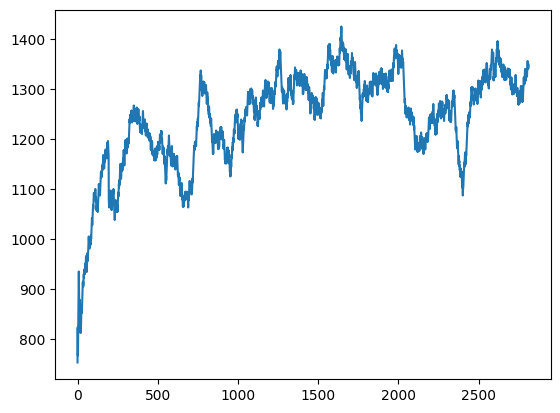

In [10]:
plt.plot(bullet_df.user_rating)

In [11]:
bullet_df['roll_10'] = bullet_df['user_rating'].rolling(10).mean()
bullet_df['roll_10']

/tmp/ipykernel_13892/3708227574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bullet_df['roll_10'] = bullet_df['user_rating'].rolling(10).mean()


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
2807    1338.6
2808    1340.2
2809    1341.9
2810    1342.0
2811    1343.7
Name: roll_10, Length: 2812, dtype: float64

In [12]:
bullet_df['every_10'] = bullet_df.user_rating[::10]
bullet_df

/tmp/ipykernel_13892/322789190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bullet_df['every_10'] = bullet_df.user_rating[::10]


,date,start_time,user_rating,roll_10,every_10
0,2023-09-30,2023-09-30 09:00:11,754,NaN,754.0
1,2023-10-24,2023-10-24 16:22:59,824,NaN,NaN
2,2023-11-05,2023-11-05 08:02:46,768,NaN,NaN
3,2023-11-05,2023-11-05 08:05:13,772,NaN,NaN
4,2023-11-05,2023-11-05 08:07:41,815,NaN,NaN
...,...,...,...,...,...
2807,2024-11-05,2024-11-05 14:52:33,1349,1338.6,NaN
2808,2024-11-05,2024-11-05 14:54:40,1341,1340.2,NaN
2809,2024-11-05,2024-11-05 14:56:47,1350,1341.9,NaN
2810,2024-11-05,2024-11-05 14:59:05,1342,1342.0,1342.0


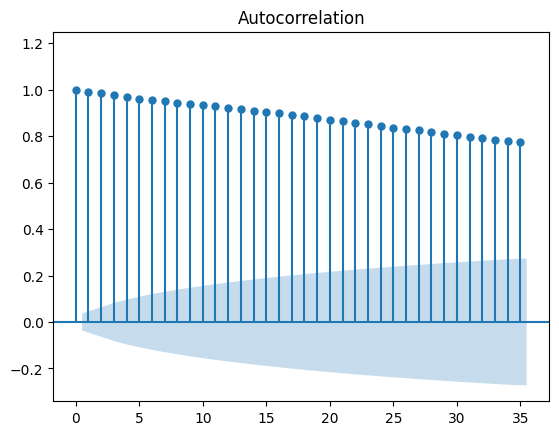

In [13]:
y=bullet_df.user_rating

plot_acf(y, auto_ylims=True);



<AxesSubplot:>

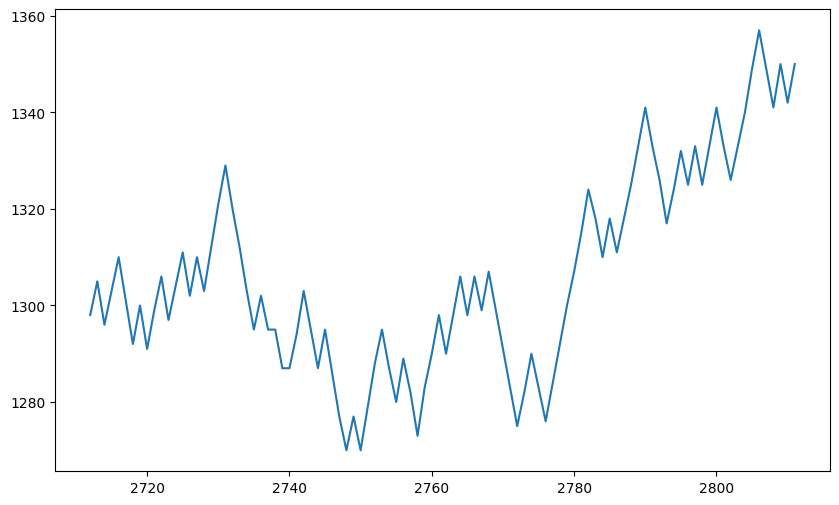

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))
y.tail(100).plot()

<AxesSubplot:>

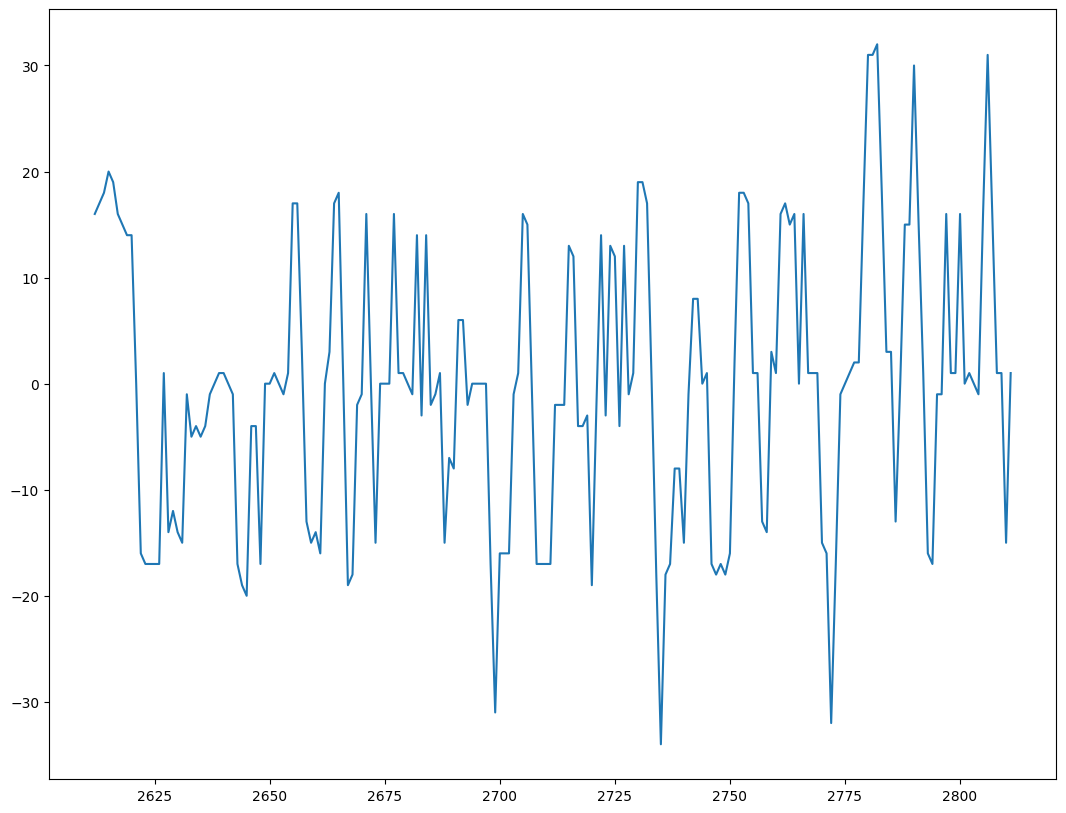

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(13,10))
y.diff(4).tail(200).plot()

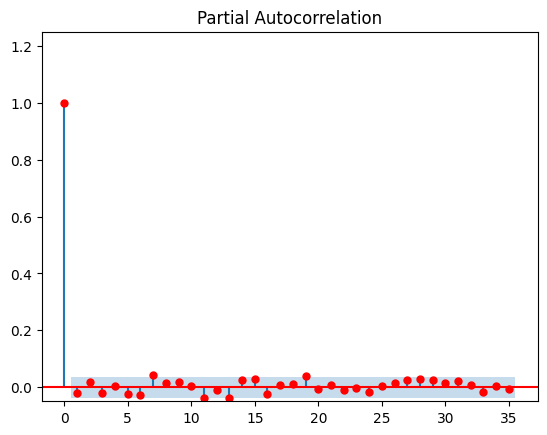

In [16]:
plot_pacf(y.diff(1).dropna(), auto_ylims=True, method="ywm", c='r');



## Allocate games into sessions

In [30]:
session_cols = ["date", "start_time","end_time", "user_rating"]
session_df = all_games_df_raw.query("time_class == 'bullet'").reset_index()[session_cols]
session_df.head(5)

,date,start_time,end_time,user_rating
0,2023-09-30,2023-09-30 09:00:11,2023-09-30 09:03:43,754
1,2023-10-24,2023-10-24 16:22:59,2023-10-24 16:25:57,824
2,2023-11-05,2023-11-05 08:02:46,2023-11-05 08:05:05,768
3,2023-11-05,2023-11-05 08:05:13,2023-11-05 08:07:37,772
4,2023-11-05,2023-11-05 08:07:41,2023-11-05 08:09:46,815


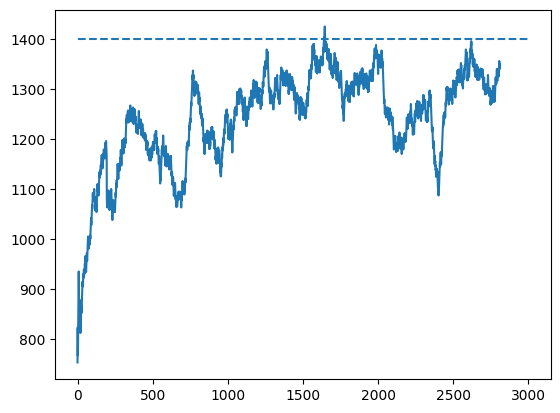

In [92]:
def add_session_col(session_df, session_gap_hours = 2):
    """
        DONE: 
            - add hrs_since_last_game column
        TODO:
            - add time_since last sesh column
            - how long was sesh
            - how many games played
            - rating change start/finish
            - max/min rating change
        
    """
    #setup
    df = session_df.copy()
    df['start_time'] = pd.to_datetime(df['start_time'])
    df['end_time'] = pd.to_datetime(df['end_time'])
    df.loc[:,"session_id"] = -1
    df = df.sort_values(by="end_time", ascending=True).reset_index(drop=True) #oldest first

    #ready to count up
    session_id = 1
    
    for i, row in df.iterrows():
        in_prev_sesh = False
        
        if i-1 < 0:
            in_prev_sesh = False
            hrs_since_last_game = np.NaN
        else:
            prev_game_end = df.loc[i-1, "end_time"]
            this_game_start = df.loc[i, "start_time"]
            
            game_time_diff = this_game_start - prev_game_end
            
            hrs_since_last_game = game_time_diff / np.timedelta64(1, 'h')
            hrs_since_last_game = 0 if hrs_since_last_game < 0 else hrs_since_last_game
            
            if hrs_since_last_game > session_gap_hours:
                in_prev_sesh = False
            else:
                in_prev_sesh = True
        
        #create time since last gast column
        df.loc[i, "hrs_since_last_game"] = hrs_since_last_game
                    
        #if this game started within <session_gap_hours> of the previous one, then label it with session_id
        if in_prev_sesh:
            df.loc[i,"session_id"] = session_id
        #else label it with incremented session_id
        else:
            df.loc[i,"session_id"] = session_id
            session_id += 1
    return df

session_df = add_session_col(session_df)
session_df.user_rating.plot()
plt.hlines(y=1400, xmin=0, xmax=3000, ls='--')


In [89]:
agg_sesh = {
    "user_rating" : 'last',
    'start_time' : "first",
    'end_time' : "last"
}
rename_sesh = {
    "user_rating" : "sesh_end_rating",
    "start_time" : "sesh_start_time",
    'end_time' :'sesh_end_time'
}

session_df.groupby(by="session_id").agg(agg_sesh).rename(columns=rename_sesh)[-20:]

,sesh_end_rating,sesh_start_time,sesh_end_time
session_id,,,
171,1293,2024-09-24 20:47:43,2024-09-26 08:56:45
172,1296,2024-09-26 08:57:00,2024-09-27 14:26:32
173,1271,2024-09-27 15:52:32,2024-09-29 20:22:53
174,1307,2024-09-29 20:22:59,2024-10-01 09:59:06
175,1299,2024-10-03 19:23:34,2024-10-03 19:24:46
176,1317,2024-10-03 19:24:51,2024-10-04 09:19:36
177,1371,2024-10-04 09:19:57,2024-10-11 11:26:14
178,1357,2024-10-11 11:26:21,2024-10-12 10:05:21
179,1318,2024-10-12 10:06:11,2024-10-18 11:26:14
